# **Dynamic Arrays**

In [ ]:
#to create array types of C
import ctypes

**Functions implemented** : create list, len, append, print, indexing, pop, clear, find, insert, delete, remove

In [ ]:
class MyList:

  def __init__(self):
    self.size = 1
    self.n = 0
    # C type's array with size->self.size
    self.A = self.__make_array(self.size)

  def __len__(self):
    return self.n

  def append(self,item):
    # check if vacant
    if self.n == self.size:
      # if array is full -> resize
      self.__resize(self.size*2)

    self.A[self.n] = item
    self.n = self.n + 1

  def pop(self):

    if self.n == 0:
      return 'Empty List'

    print(self.A[self.n-1])
    self.n = self.n - 1

  def clear(self):
    self.n = 0
    self.size = 1

  def find(self,item):

    for i in range(self.n):
      if self.A[i] == item:
        return i

    return 'ValueError - not in list'

  def insert(self,pos,item):

    if self.n == self.size:
      self.__resize(self.size*2)

    for i in range(self.n,pos,-1):
      self.A[i] = self.A[i-1]

    self.A[pos] = item
    self.n = self.n + 1

  def remove(self,item):
    # search and get pos
    pos = self.find(item)
    if type(pos) == int:
      # delete
      self.__delitem__(pos)
    else:
      return pos

  def __resize(self,new_capacity):
    # create a new array with new capacity
    B = self.__make_array(new_capacity)
    self.size = new_capacity
    # copy the content of old array to new one
    for i in range(self.n):
      B[i] = self.A[i]
    # reassign A
    self.A = B

  def __str__(self):
    result = ''
    for i in range(self.n):
      result = result + str(self.A[i]) + ','

    return '[' + result[:-1] + ']'

  def __getitem__(self,index):

    if 0<= index < self.n:
      return self.A[index]
    else:
      return 'IndexError'

  def __delitem__(self,pos):
    # delete the item at pos
    if 0<= pos < self.n:
      for i in range(pos,self.n-1):
        self.A[i] = self.A[i+1]

      self.n = self.n - 1

  def __make_array(self,capacity):
    # referential array(C type)
    return (capacity*ctypes.py_object)()

In [ ]:
L=MyList()

In [ ]:
L.append('Hello')
L.append('World')
L.append(1)
L.append(4.4)

In [ ]:
print(L)

[Hello,World,1,4.4]


# **Linked List**

In [ ]:
class Node:

  def __init__(self,value):
    self.data=value
    self.next=None

In [ ]:
a=Node(1)
b=Node(2)
c=Node(3)

In [ ]:
a.next=b
b.next=c

In [ ]:
id(a)

136100878238288

**Manually created methods of Linked List**

In [ ]:
class Node:

  def __init__(self,value):
    self.data=value
    self.next=None

In [ ]:
class LinkedList:

  def __init__(self):

    #Empty Linked List
    self.head=None
    self.count=0
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def __len__(self):
    return self.count
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def return_tail(self):
    current=self.head

    while current.next is not None:
      current=current.next

    tail=current

    return tail
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def insert_at_head(self,value):

    #create newnode
    newnode=Node(value)

    # #if the list is empty
    # if self.head==None:
    #   head=newnode
    # else:
    newnode.next=self.head
    self.head=newnode

    #increment count
    self.count=self.count+1
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def __str__(self):

    #iterator
    current=self.head

    result=''

    while current != None:

      result=result+str(current.data)+'->'
      current=current.next

    #if there are no nodes
    if len(result)== 0:
      print('The list is empty')
    else:
     return result[:-2]

    return ""

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def append(self,value):

    newnode=Node(value)

    #for empty list
    if self.head is None:
      self.head=newnode

    else:

      tail=self.return_tail()
      tail.next=newnode
      tail=newnode

    self.count=self.count+1
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def find_node(self,value):

    current=self.head

    if current is None:
      return 'List is empty'
    else:
      tail=self.return_tail()
      while (current.data is not value) & (current is not tail):
        current=current.next

      if current.data is value:
        return current

      elif current.next is None:
        return 'Value does not exist'
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def insert_after_thisdata(self,value,newvalue):

    target_node=self.find_node(value)
    newnode=Node(newvalue)

    if type(target_node) is not str:
      #create connection
      if target_node.next is not None:
        newnode.next=target_node.next
        target_node.next=newnode
        self.count=self.count+1
    else:
      print('Data not found')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def clear(self):
    self.head=None
    self.count=0
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def delete_from_head(self):
    if self.head is not None:
      self.head=self.head.next
      self.count=self.count-1
    else:
      print('The list is empty')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def delete_from_tail(self):

    if self.head is None:
      return 'Empty Linked List'

    current=self.head

    #if there is only one data
    if current.next is None:
      return self.delete_from_head()

    while current.next.next is not None:
      current=current.next

    current.next=None
    self.count=self.count-1
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def remove(self,value):

    current=self.head

    #we have to remove head node case
    if current.data==value:
      return self.delete_from_head()

    if self.head==None:
      print('Empty Linked List')

    while current.next!=None:
      if current.next.data!=value:
        current=current.next
      else:
        break

    #value has not been found
    #we are at the tail
    if current.next==None:
      print('Value is not there')
    else:
      #create connection
      current.next=current.next.next

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def give_nodepos(self,value):
    current=self.head
    pos=0

    while current!=None:
      if current.data==value:
        return pos
      current=current.next
      pos+=1

    if pos==0:
      return 'Empty Linked List'
    else:
      return 'The value has not been found'

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def __getitem__(self,index):

    current=self.head
    pos=0

    while current!=None:
      if pos==index:
        return current.data
      current=current.next
      pos+=1

    if pos!=index:
      print('Index is not valid')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def replace_max(self,value):

    current=self.head
    max=current

    while current is not None:
      if current.data>max.data:
        max=current
      current=current.next

    max.data=value

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def summation_of_odd_nodes(self):

    size=len(self)
    sum=0

    for pos in range(1,size,2):
      sum+=self[pos]

    return sum

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def reverse(self):
    #inplace reversal

    prev_node=None #head's prev node is None
    current=self.head

    while current!=None:
      nextnode=current.next
      current.next=prev_node
      prev_node=current
      current=nextnode

    self.head=prev_node

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


  def change_sentence(self):


#Rules : 1)Replace '*' or '/' by a single space
#2) In case of 2 consecutive occurences of '*' or '/',
#replace those two occurences by a single space
#and convert the next character to upper case

    current=self.head

    while current!=None:

      if current.data=='*' or current.data=='/':
        current.data=' '

        if current.next.data=='*' or current.next.data=='/':
          current.next.next.data=current.next.next.data.upper()
          current.next=current.next.next

      current=current.next
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~







In [ ]:
L = LinkedList()

In [ ]:
word_list=LinkedList()
word_list.append('T')
word_list.append('h')
word_list.append('e')
word_list.append('/')
word_list.append('*')
word_list.append('s')
word_list.append('k')
word_list.append('y')
word_list.append('*')
word_list.append('i')
word_list.append('s')
word_list.append('/')
word_list.append('/')
word_list.append('b')
word_list.append('l')
word_list.append('u')
word_list.append('e')
print(word_list)
word_list.change_sentence()
print(word_list)

T->h->e->/->*->s->k->y->*->i->s->/->/->b->l->u->e
T->h->e-> ->S->k->y-> ->i->s-> ->B->l->u->e


In [ ]:
#getitem(L,2)
L[1]

3

In [ ]:
L.give_nodepos(2)

2

In [ ]:
L.insert_at_head(1)
L.insert_at_head(2)
L.insert_at_head(3)
L.insert_at_head(4)
# L.insert_at_head(5)
# L.insert_at_head(6)
# L.insert_at_head(7)
# L.insert_at_head(8)
# L.insert_at_head(9)
# #L.insert_at_head(10)

In [ ]:
print(L)

4->3->2->1


In [ ]:
L.reverse()
print(L)

1->2->3->4


In [ ]:
print(L.summation_of_odd_nodes())

20


In [ ]:
#L.append(6)
L.replace_max(14)
print(L)

14->3->2->1


In [ ]:
L.delete_from_tail()
print(L)

4->3->2


In [ ]:
L.remove(2)
print(L)

The list is empty


TypeError: ignored

In [ ]:
L.clear()
print(L)

The list is empty



In [ ]:
L.insert_after_thisdata(2,5)
print(L)

4->3->2->5->1


# **Stack**

In [ ]:
class Node:

  def __init__(self,value):
    self.data=value
    self.next=None

In [ ]:
class Stack:

  def __init__(self):
    #top is empty
    self.top=None
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def isempty(self):
    return (self.top==None)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def push(self,value):
    newnode=Node(value)

    newnode.next=self.top
    self.top=newnode
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def traverse(self):

    current=self.top

    while current!=None:
      print(current.data, end=' ')
      current=current.next
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def peek(self):

    if (self.isempty()):
      print("Stack is empty")
    else:
      return self.top.data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def pop(self):

    if (self.isempty()):
      print('Stack is Empty')
      return ''
    else:
      temp=self.top
      self.top=self.top.next
      return temp.data

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def size(self):
    current=self.top
    count=0

    while current!=None:
      count+=1
      current=current.next

    return count
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
s=Stack()

In [ ]:
s.isempty()

False

In [ ]:
s.push(2)
s.push(3)
s.push(4)
s.push(5)

In [ ]:
s.traverse()

5 4 3 2 

In [ ]:
s.pop()
s.peek()

'Stack is empty'

# Reverse a string using a stack

In [ ]:
#input->hello
#output->olleh


def reverse_string(word):

  s=Stack()
  reversed_string=''

  for char in word:
    s.push(char)

  while (not s.isempty()):
    #print(s.pop())
    reversed_string+=s.pop()

  print(reversed_string)

word=input("Please enter a word: ")
reverse_string(word)



Please enter a word: Hello
olleH


# Undo Redo
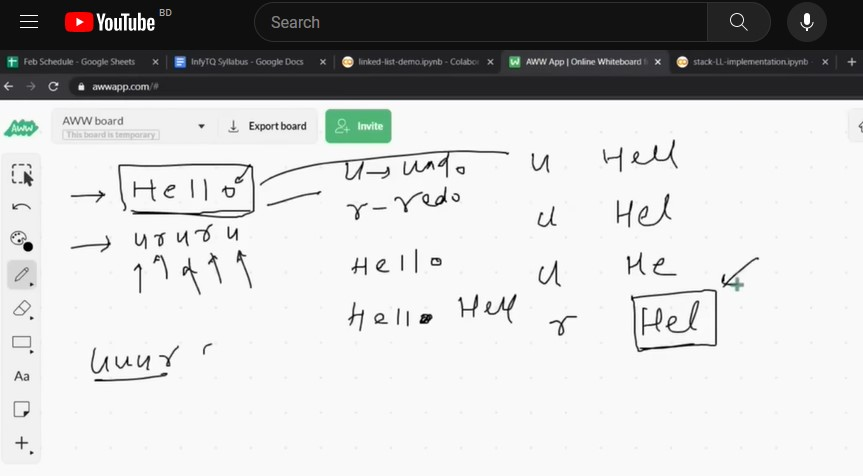

In [ ]:
def undo_redo(word,operation_string):

  #there will be 2 stacks
  #Undo stack and Redo stack

  undo=Stack()
  redo=Stack()

  for char in word:
    undo.push(char)

  for char in operation_string:
    if char=='u':
      character=undo.pop()
      redo.push(character)
    elif char=='r':
      character=redo.pop()
      undo.push(character)
    else:
      print('Not a valid operation')

  output=''
  while (not undo.isempty()):
    output+=undo.pop()

  print('This is the output: ',output[len(output)::-1])

word=input("Please enter a word: ")
operation=input("Please enter the operations: ")
undo_redo(word,operation)

Please enter a word: Hello
Please enter the operations: uuurr
This is the output:  Hell


# Celebrity Problem

In [ ]:
#A celebrity is someone who does not know anyone but everyone knows them
#Two cannot be a celebrity
#It is possible that no one is a celebrity

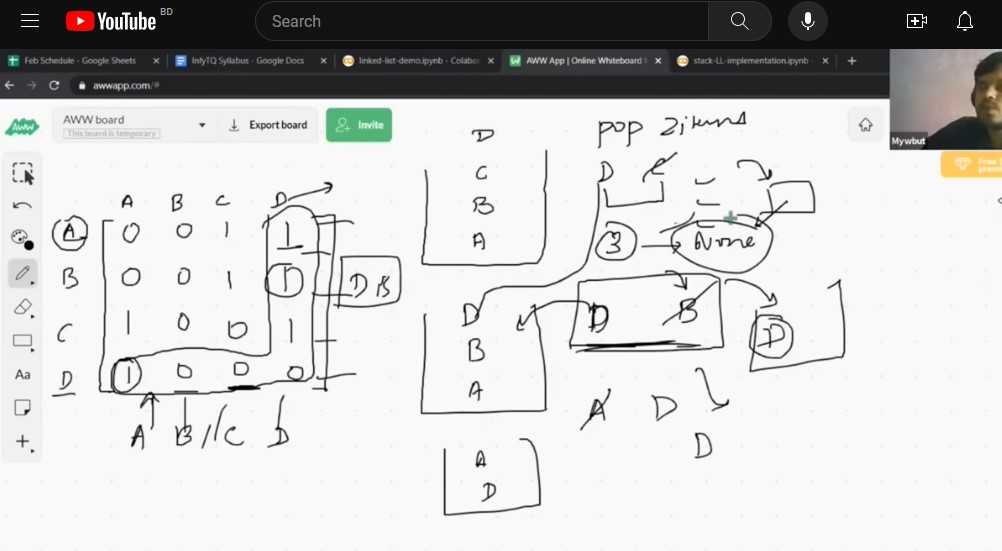

In [ ]:
L=[
    [0,0,1,1],
    [0,0,1,0],
    [0,0,0,0],
    [0,0,1,0]
]

In [ ]:
print(len(L))

4


In [ ]:
def find_the_celebrity(L):

  s=Stack()

  #the first row is considered person A at index 0
  #the second row is considered person B at index 1 in 2D matrix
  #pushing everyone in a stack
  for i in range(len(L)):
    s.push(i)

  #as long as there are 2 people in the stack,
  #we take 2 of them out for comparison
  while s.size()>=2:

    #taking out 2 people
    person1=s.pop()
    person2=s.pop()

    if L[person1][person2]==0:
      #person2 is not a celebrity
      s.push(person1)
    else:
      #person1 is not a celebrity
      s.push(person2)

  #checking if the potential candidate is a celeb
  celebrity=s.pop()

  for i in range(len(L)):

    if i!=celebrity:
      if L[i][celebrity]==0 or L[celebrity][i]==1:
        print('Nobody is a celebrity')
        return

  print('The celebrity is ',celebrity)



In [ ]:
find_the_celebrity(L)

The celebrity is  2


# Balanced Parenthesis

In [ ]:
#opening brackets -> push
#closing brackets -> peek and if it matches, pop
def balanced_parenthesis(sentence):
  s=Stack()

  for char in sentence:
    if char=='[' or char=='{' or char=='(':
      s.push(char)
    elif char==']':
      if s.peek()=='[':
        s.pop()
    elif char=='}':
      if s.peek()=='{':
        s.pop()
    elif char==')':
      if s.peek()=='(':
        s.pop()


  if s.isempty() is True:
    print('Balanced')
  else:
    print('Unbalanced')

In [ ]:
balanced_parenthesis('[{(a+b)+(c+d)}]')
balanced_parenthesis('[[(a+b)]')
balanced_parenthesis('(a+b)(')
balanced_parenthesis('[(a+b)')

Balanced
Unbalanced
Unbalanced
Unbalanced


# Stacks using arrays

In [ ]:
L=[1,2,3,4,5]

In [ ]:
#Stack operations
L.append(6)#push()

In [ ]:
L

[1, 2, 3, 4, 5, 6]

In [ ]:
#pop
L.pop()
L

[1, 2, 3, 4, 5]

In [ ]:
#peek()
L[-1]

5

In [ ]:
class Stack:

  def __init__(self,size):
    self.size=size
    self.stack=[None]*self.size
    self.top=-1
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def push(self,value):

    if self.top==self.size-1:
      print('Overflow')
      return 'Overflow'
    else:
      self.top+=1
      self.stack[self.top]=value
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def pop(self):

    if self.top==-1:
      print('Stack is empty')
      return
    else:
      data=self.stack[self.top]
      self.top-=1
      print(data)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def traverse(self):

    for i in range(self.top+1):
      print(self.stack[i],end=' ')

In [ ]:
s=Stack(3)
#array size is fixed

In [ ]:
#we do not want to manipulate it
#s.stack

In [ ]:
s.push(4)


In [ ]:
s.push(5)
s.traverse()

4 5 

In [ ]:
s.push(6)


In [ ]:
s.push(7)
s.stack

Overflow


[4, 4, 5]

In [ ]:
s.pop()

6


In [ ]:
s.pop()

5


In [ ]:
s.pop()


4


In [ ]:
s.pop()

Stack is empty


In [ ]:
s.traverse()

4 5 6 

# **Queue Implementation using Linked List**

In [ ]:
class Node:

  def __init__(self,value):
    self.data=value
    self.next=None

In [ ]:
class Queue:

  def __init__(self):
    self.front=None
    self.rear=None
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def enqueue(self,value):

    newnode=Node(value)

    #queue is empty
    if self.rear==None:
      self.front=newnode
      self.rear=self.front
    else:
      self.rear.next=newnode
      self.rear=newnode

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def dequeue(self):

    #queue is empty
    if self.front==None:
      print('The queue is empty')
      return
    else:
      self.front=self.front.next

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def traverse(self):

    current=self.front

    while current!=None:
      print(current.data,end=' ')
      current=current.next

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def isempty(self):
    return self.front==None

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def size(self):

    current=self.front
    counter=0

    while current!=None:
      counter+=1
      current=current.next

    return counter
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def front_peek(self):

    if self.front==None:
      print('The queue is empty')
      return
    else:
      print(self.front.data)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def rear_peek(self):

    if self.front==None:
      print('The queue is empty')
      return
    else:
      print(self.rear.data)

In [ ]:
q=Queue()

In [ ]:
q.isempty()

True

In [ ]:
q.enqueue(4)
q.enqueue(5)
q.enqueue(6)

In [ ]:
q.traverse()

4 5 6 

In [ ]:
q.dequeue()
q.traverse()

The queue is empty


In [ ]:
q.front_peek()

4


In [ ]:
q.rear_peek()

6


# Queue using 2 stacks

In [ ]:
#use 1 stack to enqueue ->push
#use the other stack to dequeue->pop

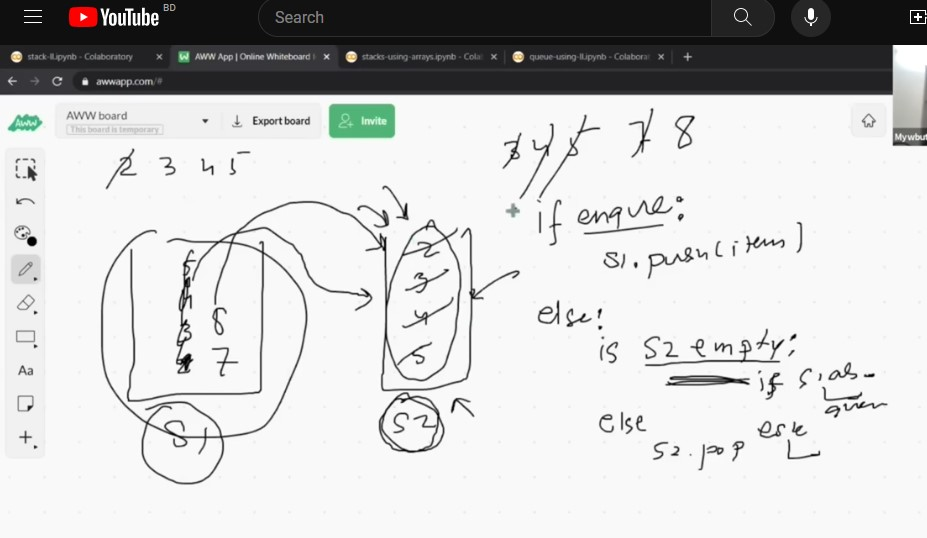

In [ ]:
# def queue_using_two_stacks(text,num):

#   s1=Stack()
#   s2=Stack()

#   #enqueue the entire thing to s1
#   for char in text:
#     s1.push(char)

#   number_of_dequeues=num

#   for i in range(0,num):




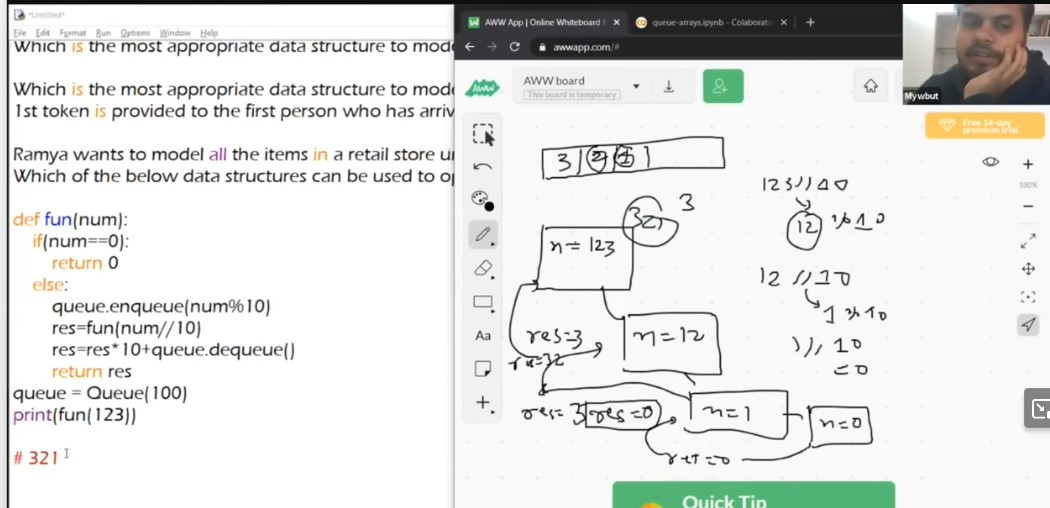

# **Hashing**

In [ ]:
#search in constant time
#choose a hashing function that reduces collision

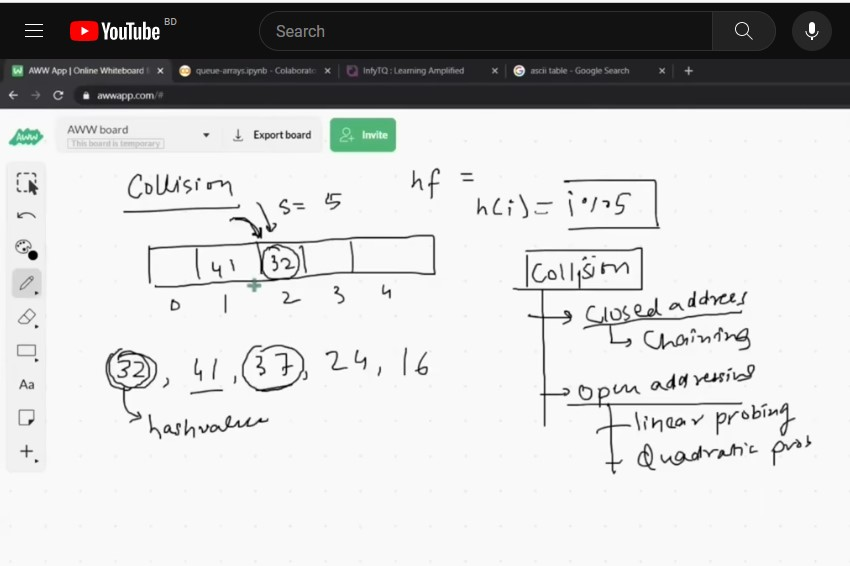

# Closed Addressing : Chaining

In [ ]:
#Each of the cells is a node not an array

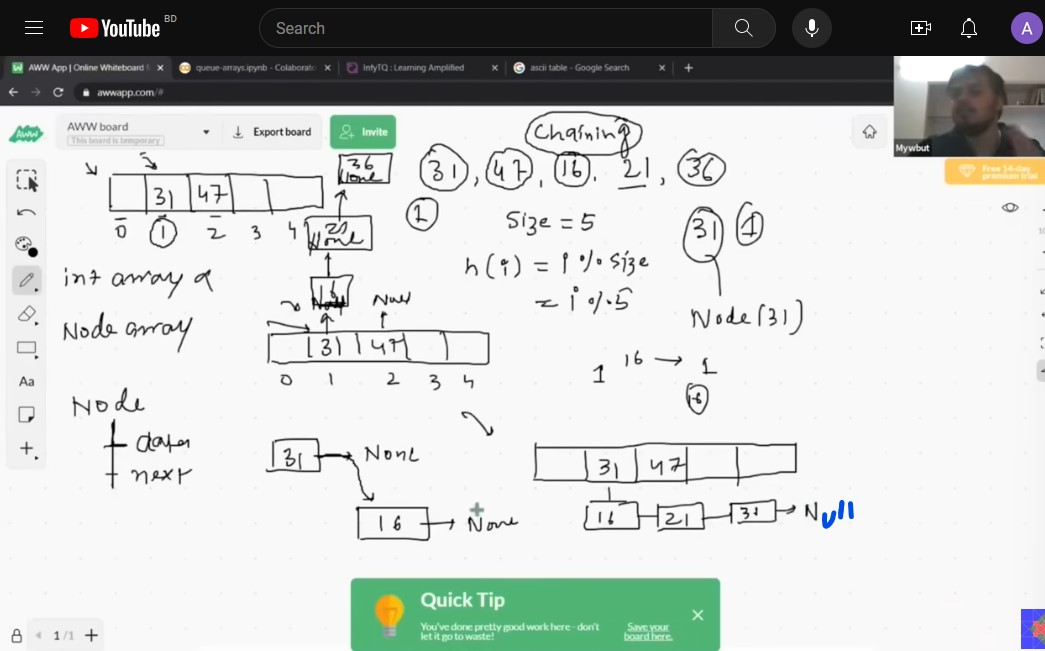

In [ ]:
#If  the chaining is greater than the array size itself,
#1)Rehash : if loadfactor is crossed, make an array of a bigger size than the original

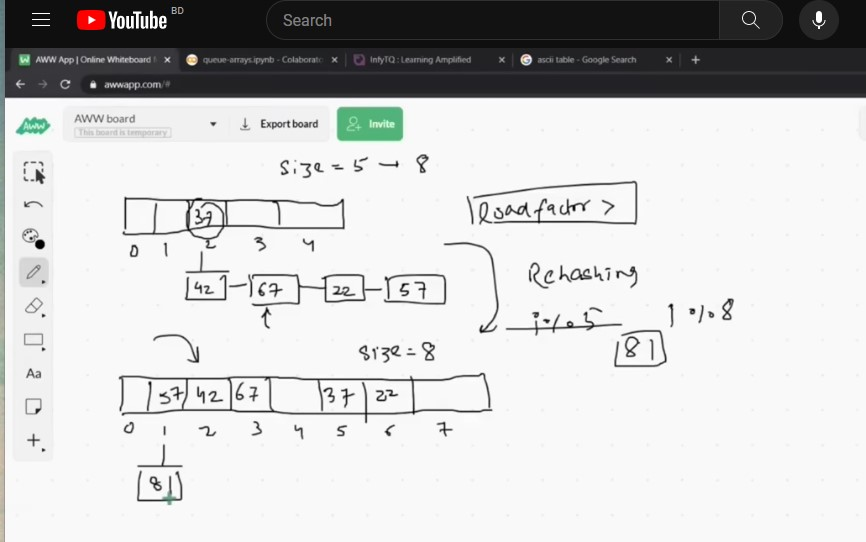

In [ ]:
#2) Convert it into a (balanced) tree

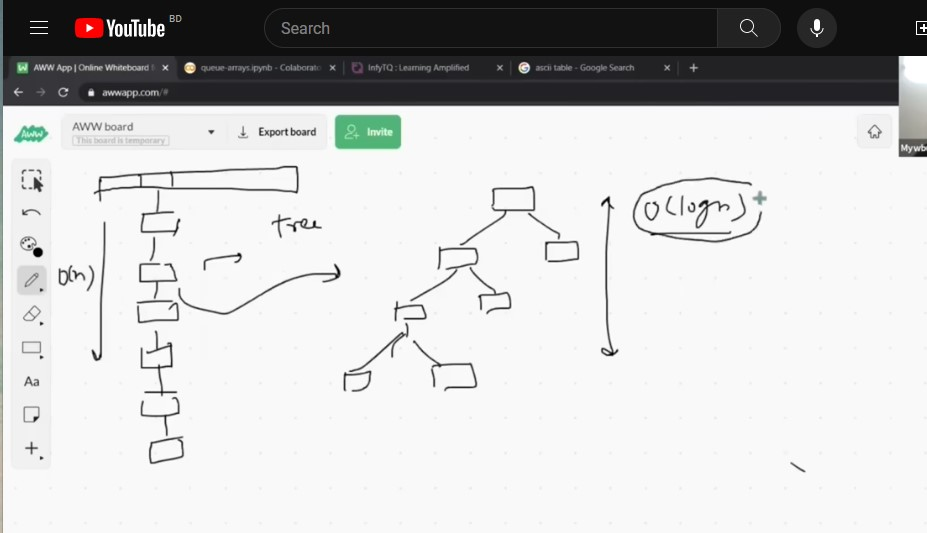

In [ ]:
#Array of Linked List

In [ ]:
class Node:

  def __init__(self,key,value):
    self.key=key
    self.value=value
    self.next=None

In [ ]:


class LinkedList:

  def __init__(self):
    self.head = None

  def add(self, key, value):

    new_node = Node(key, value)

    if self.head == None:
      self.head = new_node
    else:

      temp = self.head

      while temp.next != None:
        temp = temp.next

      temp.next = new_node

  def delete_head(self):

    if self.head == None:
      return "Empty"
    else:
      self.head = self.head.next

  def remove(self, key):
    if self.head.key == key:
      self.delete_head()
      return

    if self.head == None:
      return "Empty"
    else:

      temp = self.head

      while temp.next != None:
        if temp.next.key == key:
          break
        temp = temp.next

      if temp.next == None:
        return "Not Found"
      else:
        temp.next = temp.next.next


  def traverse(self):

    temp = self.head

    while temp != None:

      print(temp.key,"-->",temp.value," ", end=" ")
      temp = temp.next

  def size(self):

    temp = self.head
    counter = 0

    while temp != None:

      counter += 1
      temp = temp.next

    return counter

  def search(self,key):

    temp = self.head
    pos = 0

    while temp != None:

      if temp.key == key:
        return pos

      temp = temp.next
      pos += 1

    return -1

  def get_node_at_index(self,index):

    temp = self.head
    counter = 0

    while temp is not None:

      if counter == index:
        return temp
      temp = temp.next
      counter+=1





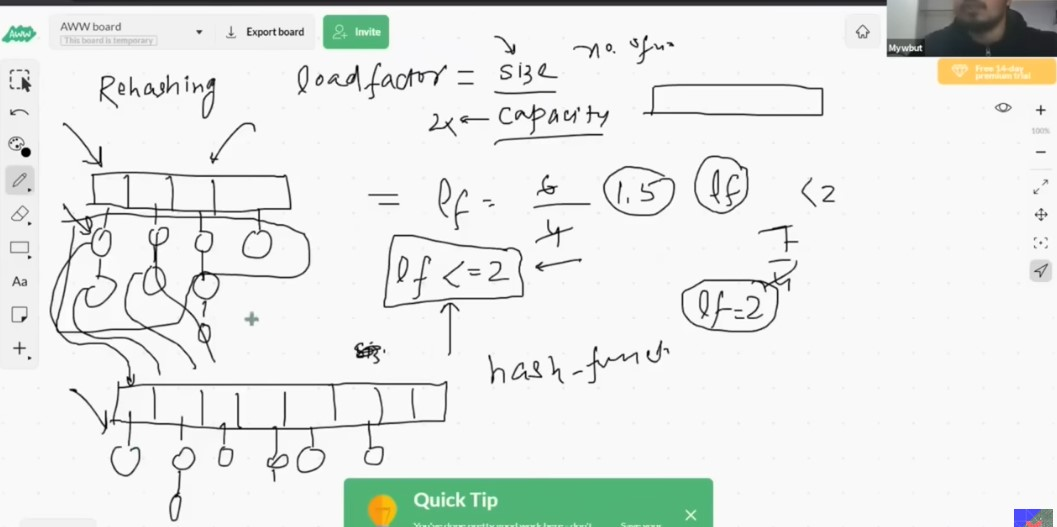

In [ ]:
class Dictionary:

  def __init__(self,capacity):

    self.capacity=capacity
    self.size=0

    #create array of LinkedList
    self.buckets=self.make_array(self.capacity)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def make_array(self,capacity):
    L=[]

    for i in range(capacity):
      L.append(LinkedList())
    return L

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def put(self,key,value):

    #we do not need rehash
    #each cell is a linkedlist and the bucket index is fixed
    bucket_index=self.hash_function(key)

    node_index=self.get_node_index(bucket_index,key)

    if node_index==-1:
      #insert new key
      self.buckets[bucket_index].add(key,value)
      self.size+=1

      load_factor=self.size/self.capacity
      print(load_factor)

      if (load_factor>=2):
        self.rehash()
    else:
      #duplicates
      #just update value
      node=self.buckets[bucket_index].get_node_at_index(node_index)
      node.value=value

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def rehash(self):

    #when load factor is exceeded, bucket of double the size will be created

    #double the capacity of the bucket
    self.capacity=self.capacity*2
    #store the current bucket in a temp bucket
    old_bucket=self.buckets
    #creating new bucket with recalculated hash function so size for now is 0
    self.size=0
    #make new bucket
    self.buckets=self.make_array(self.capacity)

    #traverses buckets (horizontally)
    for i in old_bucket:
      #traverses each linked list of bucket (vertically)
      for j in range(i.size()):
        #fetching the node
        node=i.get_node_at_index(j)
        key_element=node.key
        value_element=node.value
        self.put(key_element, value_element)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def get_node_index(self,bucket_index,key):

    #buckets[bucket_index] is the fixed Linked List object type
    #where we will append our key,value

    #if it is a linked list type object, it has the properties of LL

    #getting the node_index
    #if the key already exists, we will get the indes
    #else, we will get '-1' indicating our key is unique
    node_index=self.buckets[bucket_index].search(key)

    return node_index

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def hash_function(self,key):
    return abs(hash(key))%self.capacity

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def __setitem__(self,key,value):
    self.put(key,value)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def get(self,key):

    #get the bucket index first
    #will traverse in that fixed bucket index
    bucket_index=self.hash_function(key)

    probable_position=self.buckets[bucket_index].search(key)

    if probable_position==-1:
      return 'The key does not exist'
    else:
      #key exists

      #get node
      node=self.buckets[bucket_index].get_node_at_index(probable_position)
      return node.value

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def __getitem__(self,key):
    return self.get(key)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def __delitem__(self,key):

    bucket_index=self.hash_function(key)

    self.buckets[bucket_index].remove(key)

    counter=0

    #decrement self.size by 1 if it is successful
    for i in self.buckets:
      #traverses each linked list of bucket (vertically)
      for j in range(i.size()):
        counter+=1

    self.size=counter


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def __str__(self):

    for i in self.buckets:
      i.traverse()

    return ""

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def __len__(self):
    return self.size


In [ ]:
D1=Dictionary(4)

In [ ]:
D1.put("php",2000)

0.25


In [ ]:
D1['python']=25

0.5


In [ ]:
D1['c']=50
D1['c++']=75

0.75
1.0


In [ ]:
print(D1)

php --> 2000   python --> 25   c --> 50   c++ --> 75   


In [ ]:
del D1['c']


In [ ]:
len(D1)

3

In [ ]:
D1['c']

'The key does not exist'

In [ ]:
D1['php']
D1['c']

'The key does not exist'

In [ ]:
D1.put('python',34)
D1.put('c',25)

# Open Addressing : Linear Probing

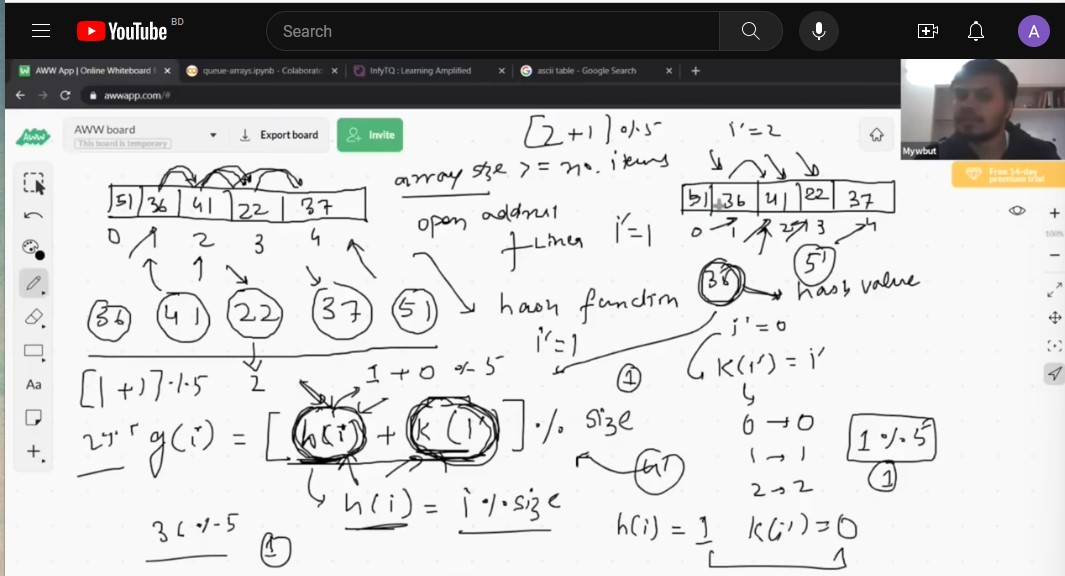

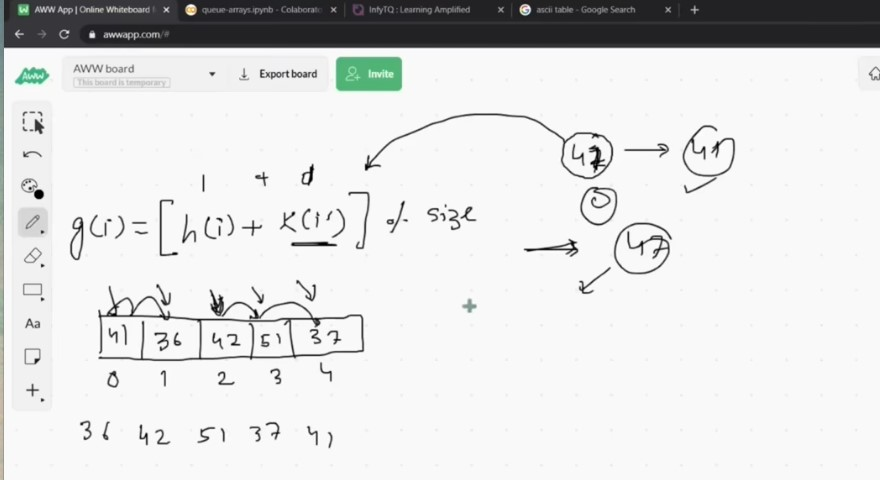

In [ ]:
#Linear Probing does clustering
#This is the drawback if the array is very large
#Solution: Quadratic Probing

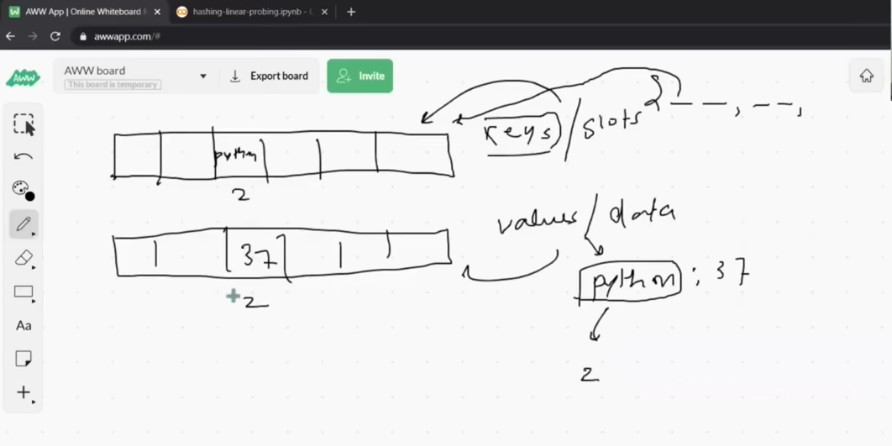

In [ ]:
class Dictionary:

  def __init__(self,size):
    self.size=size
    self.slots=[None]*self.size
    self.data=[None]*self.size
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def put(self,key,value):
    hash_value=self.hash_function(key)

    #if the index is None, we just insert
    if self.slots[hash_value] is None:
      self.slots[hash_value]=key
      self.data[hash_value]=value
    else:
      #case 1: same key is there (duplicates)
      if self.slots[hash_value]==key:
        #we just update the data
        self.data[hash_value]=value

      #case 2: some other key is there
      #it is occupied, so go to the next available cell
      else:
        #recalculate hash
        new_hashvalue=self.rehash(hash_value)

        #what if it is agan occupied
        #run a loop until you get an empty cell
        #Also, suppose the key already exists somewhere
        #In that case, we have to update the value instead of finding an empty cell
        while self.slots[new_hashvalue]!=None and self.slots[new_hashvalue]!=key:
          new_hashvalue=self.rehash(new_hashvalue)

        #no duplicates found
        if self.slots[new_hashvalue]==None:
          self.slots[new_hashvalue]=key
          self.data[new_hashvalue]=value
        else:
          #key already exists
          self.data[new_hashvalue]=value
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def rehash(self, old_hash):
      return (old_hash+1)%self.size
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  def hash_function(self,key):
    #to make sure hash function returns positive value
    #we will use absolute
    return abs(hash(key)) % self.size

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def __setitem__(self,key,value):
    self.put(key,value)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def get(self,key):
    start_position=self.hash_function(key)

    #3 cases
    #c1: we have reached our starting_position
    #c2: we have reached 'None' cell;
    #since this is linear probing, if we encounter a None,
    #the next available space was not occupied meaning key does not exist
    #c3: we have found our key

    current_position=start_position

    while self.slots[current_position]!=None:

      if self.slots[current_position]==key:
        return self.data[current_position]

      current_position=self.rehash(current_position)

      if current_position==start_position:
        print('Not Found')
        return

    print('Not Found')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def __getitem__(self,key):
    return self.get(key)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  def __str__(self):

    for i in range(self.size):

      if self.slots[i]!=None:
        print(self.slots[i]," : ",self.data[i],end=' ')

    return ''

In [ ]:
D1=Dictionary(3)

In [ ]:
print(D1.slots)
print(D1.data)

[None, None, None]
[None, None, None]


In [ ]:
D1['c']

Not Found


In [ ]:
D1['python']=20

In [ ]:
D1.put("java",1000)

In [ ]:
print(D1)

java  :  1000 python  :  20 


In [ ]:
D1.get('c')

Not Found


In [ ]:
hash(123)

123

In [ ]:
hash("python")

5888377390302640085

In [ ]:
hash(1.5)

1152921504606846977

In [ ]:
hash([1,2,3,4])
#will throw an error since it is mutable

TypeError: ignored

In [ ]:
hash((1,2,3,4))
#immutable

590899387183067792

# Open Addressing:Quadratic Probing

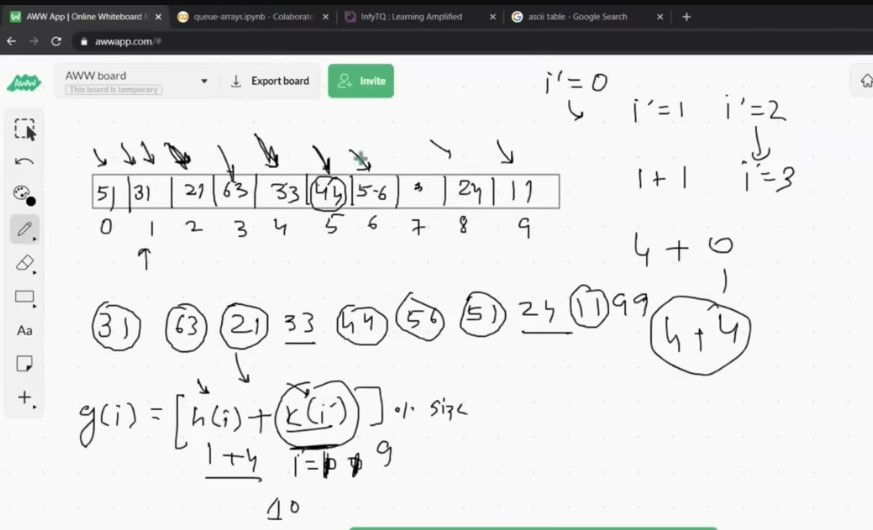

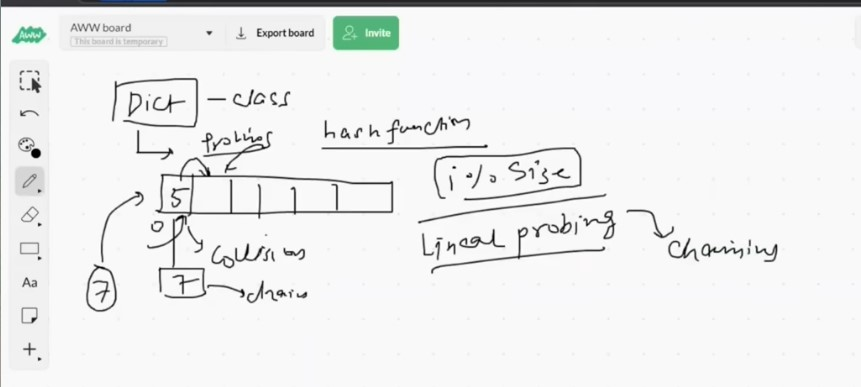

In [ ]:
#same as linear probing
#but change the rehash() method with the square of k